In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [28]:
#Used the smaller version of the dataset to reduce computations
#loading in the csv data
df = pd.read_csv('/kaggle/input/fashion-product-images-small/myntradataset/styles.csv',error_bad_lines=False)

df.head()

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [29]:
df = df.dropna()
df.nunique()
df.columns

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')

In [30]:
# Looking at all the unique labels in all categorical columns 
cat_columns = ['gender', 'masterCategory', 'subCategory', 'articleType','baseColour', 'season', 'year', 'usage']

for col in cat_columns:
    print(col)
    print(df[col].unique())
    print('-------------------------')

gender
['Men' 'Women' 'Boys' 'Girls' 'Unisex']
-------------------------
masterCategory
['Apparel' 'Accessories' 'Footwear' 'Personal Care' 'Free Items'
 'Sporting Goods' 'Home']
-------------------------
subCategory
['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Shoe Accessories' 'Fragrance' 'Jewellery'
 'Lips' 'Saree' 'Eyewear' 'Scarves' 'Dress' 'Loungewear and Nightwear'
 'Wallets' 'Apparel Set' 'Headwear' 'Mufflers' 'Skin Care' 'Makeup'
 'Free Gifts' 'Ties' 'Accessories' 'Nails' 'Beauty Accessories'
 'Water Bottle' 'Skin' 'Eyes' 'Bath and Body' 'Gloves'
 'Sports Accessories' 'Cufflinks' 'Sports Equipment' 'Stoles' 'Hair'
 'Perfumes' 'Home Furnishing' 'Umbrellas' 'Wristbands' 'Vouchers']
-------------------------
articleType
['Shirts' 'Jeans' 'Watches' 'Track Pants' 'Tshirts' 'Socks' 'Casual Shoes'
 'Belts' 'Flip Flops' 'Handbags' 'Tops' 'Bra' 'Sandals' 'Shoe Accessories'
 'Sweatshirts' 'Deodorant' 'Formal Shoes' 'Bracelet' 'Lips

In [31]:
value_counts = df['articleType'].value_counts()

indexes = value_counts.index

values = value_counts.values

for i in range(len(value_counts)):

    if values[i] <1000:
        break

types_used = indexes[:i]
print('Article types used: ',types_used)

Article types used:  Index(['Tshirts', 'Shirts', 'Casual Shoes', 'Watches', 'Sports Shoes',
       'Kurtas', 'Tops', 'Handbags', 'Heels', 'Sunglasses'],
      dtype='object')


In [32]:
value_counts = df['baseColour'].value_counts()

indexes = value_counts.index

values = value_counts.values

for i in range(len(value_counts)):

    if values[i] <1000:
        break

colours_used = indexes[:i]
print('Base Colours used: ',colours_used)

Base Colours used:  Index(['Black', 'White', 'Blue', 'Brown', 'Grey', 'Red', 'Green', 'Pink',
       'Navy Blue', 'Purple', 'Silver'],
      dtype='object')


In [33]:
value_counts = df['gender'].value_counts()

indexes = value_counts.index

values = value_counts.values

for i in range(len(value_counts)):

    if values[i] <1000:
        break

genders_used = indexes[:i]
print('Genders used: ',genders_used)

Genders used:  Index(['Men', 'Women', 'Unisex'], dtype='object')


In [34]:
value_counts = df['season'].value_counts()

indexes = value_counts.index

values = value_counts.values

for i in range(len(value_counts)):

    if values[i] <1000:
        break

seasons_used = indexes[:i]
print('Seasons used: ',seasons_used)

Seasons used:  Index(['Summer', 'Fall', 'Winter'], dtype='object')


In [35]:
# Removing all the examples with labels other than the selected ones
 
df = df[df['articleType'].isin(types_used)]
df = df[df['baseColour'].isin(colours_used)]
df = df[df['gender'].isin(genders_used)]
df = df[df['season'].isin(seasons_used)]

In [36]:
#number of examples we are left with
len(df)

20672

In [37]:
data = []

# Reading all the images and processing the data in them 

from tensorflow.keras.preprocessing.image import img_to_array
import cv2

invalid_ids = []

for name in df.id:

    try:
        image = cv2.imread('/kaggle/input/fashion-product-images-small/myntradataset/images/'+str(name)+'.jpg')
        image = cv2.resize(image, (80,60) )
        image = img_to_array(image)
        data.append(image)        
    except: 
        # Images for certain ids are missing, so they are not added to the dataset  
        invalid_ids.append(name)

In [38]:
# ids of missing images
print('invalid ids:')
print(invalid_ids)

invalid ids:
[39403]


In [39]:
labels = []

used_columns = ['articleType','baseColour','season','gender']

# getting labels for the columns used

for index, row in df.iterrows():

    if row['id'] in invalid_ids:
        continue

    tags = []

    for col in used_columns:
        tags.append(row[col])

    labels.append(tags)

In [40]:
import numpy as np

# converting data into numpy arrays

data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

print(labels)

[['Shirts' 'Navy Blue' 'Fall' 'Men']
 ['Watches' 'Silver' 'Winter' 'Women']
 ['Tshirts' 'Grey' 'Summer' 'Men']
 ...
 ['Casual Shoes' 'White' 'Summer' 'Men']
 ['Tshirts' 'Blue' 'Fall' 'Men']
 ['Watches' 'Pink' 'Winter' 'Women']]


In [41]:
from sklearn.preprocessing import MultiLabelBinarizer

# creating a binary vector for the input labels 

mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(labels)

print(mlb.classes_)
print(labels[0])

['Black' 'Blue' 'Brown' 'Casual Shoes' 'Fall' 'Green' 'Grey' 'Handbags'
 'Heels' 'Kurtas' 'Men' 'Navy Blue' 'Pink' 'Purple' 'Red' 'Shirts'
 'Silver' 'Sports Shoes' 'Summer' 'Sunglasses' 'Tops' 'Tshirts' 'Unisex'
 'Watches' 'White' 'Winter' 'Women']
[0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [56]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import *

#model architecture 

def build_network(width, height, depth, classes):
    input_layer = Input(shape=(width, height, depth))
    x = Conv2D(filters=32,kernel_size=(3, 3),padding='same')(input_layer)
    x = ReLU()(x)
    x = BatchNormalization(axis=-1)(x)
    
    x = Conv2D(filters=32,kernel_size=(3, 3),padding='same')(x)
    x = ReLU()(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(rate=0.25)(x)
    
    x = Conv2D(filters=64,kernel_size=(3, 3), padding='same')(x)
    x = ReLU()(x)
    x = BatchNormalization(axis=-1)(x)
    
    x = Conv2D(filters=64,kernel_size=(3, 3),padding='same')(x)
    x = ReLU()(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(rate=0.25)(x)
    
    x = Flatten()(x)
    x = Dense(units=512)(x)
    x = ReLU()(x)
    x = BatchNormalization(axis=-1)(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(units=classes)(x)
    output = Activation('softmax')(x)
    return Model(input_layer, output)

In [63]:
model = build_network(width=80,height=60,depth=3,classes=len(mlb.classes_))
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [64]:
from sklearn.model_selection import train_test_split

# splitting data into testing and training set 

(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.2, random_state=42)

In [65]:
BATCH_SIZE = 64
EPOCHS = 20
model.fit(trainX, trainY,validation_data=(testX, testY),batch_size=BATCH_SIZE,epochs=EPOCHS)

Epoch 1/20
259/259 [==============================] - 309s 1s/step - loss: 0.4564 - accuracy: 0.1111 - val_loss: 1.9012 - val_accuracy: 0.0515
Epoch 2/20
259/259 [==============================] - 306s 1s/step - loss: 0.1553 - accuracy: 0.1439 - val_loss: 0.7000 - val_accuracy: 0.2372
Epoch 3/20
259/259 [==============================] - 301s 1s/step - loss: 0.1375 - accuracy: 0.1543 - val_loss: 0.1413 - val_accuracy: 0.1937
Epoch 4/20
259/259 [==============================] - 300s 1s/step - loss: 0.1265 - accuracy: 0.1428 - val_loss: 4.5169 - val_accuracy: 0.1461
Epoch 5/20
259/259 [==============================] - 297s 1s/step - loss: 0.1202 - accuracy: 0.1510 - val_loss: 1.9043 - val_accuracy: 0.1432
Epoch 6/20
259/259 [==============================] - 299s 1s/step - loss: 0.1122 - accuracy: 0.1558 - val_loss: 0.1746 - val_accuracy: 0.1925
Epoch 7/20
259/259 [==============================] - 297s 1s/step - loss: 0.1054 - accuracy: 0.1436 - val_loss: 2.7009 - val_accuracy: 0.1511

In [66]:
result = model.evaluate(testX, testY,batch_size=BATCH_SIZE)
print(f'Test accuracy: {result[1]}')

65/65 [==============================] - 14s 219ms/step - loss: 0.1850 - accuracy: 0.0987
Test accuracy: 0.09866989403963089


In [70]:
model.save('task_two.h5')

['Men']


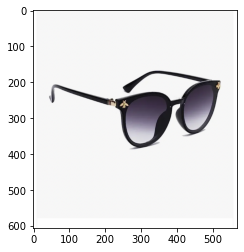

In [119]:
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open("/kaggle/input/test-amazon/Image1.png")
image = image.convert("RGB")
plt.imshow(image)
image = np.array(image.resize((80, 60)))
images_list = []
images_list.append(np.array(image))
x = np.asarray(images_list)
output_array = model.predict(x)
predicted_indices = np.where(output_array[0] == 1)[0]
predicted_classes = [mlb.classes_[idx] for idx in predicted_indices]
print(predicted_classes)

['Men']


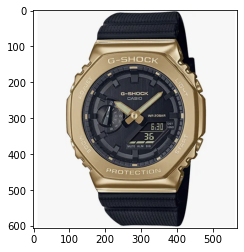

In [120]:
image = Image.open("/kaggle/input/test-amazon/Image2.png")
image = image.convert("RGB")
plt.imshow(image)
image = np.array(image.resize((80, 60)))
images_list = []
images_list.append(np.array(image))
x = np.asarray(images_list)
output_array = model.predict(x)
predicted_indices = np.where(output_array[0] == 1)[0]
predicted_classes = [mlb.classes_[idx] for idx in predicted_indices]
print(predicted_classes)

['Men']


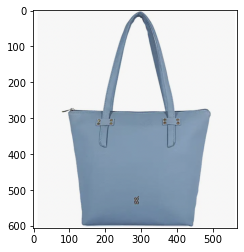

In [121]:
image = Image.open("/kaggle/input/test-amazon/Image3.png")
image = image.convert("RGB")
plt.imshow(image)
image = np.array(image.resize((80, 60)))
images_list = []
images_list.append(np.array(image))
x = np.asarray(images_list)
output_array = model.predict(x)
predicted_indices = np.where(output_array[0] == 1)[0]
predicted_classes = [mlb.classes_[idx] for idx in predicted_indices]
print(predicted_classes)

['Men']


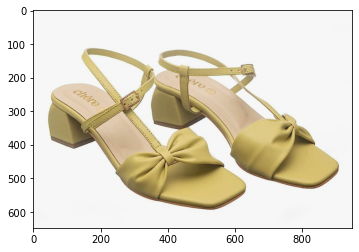

In [122]:
image = Image.open("/kaggle/input/test-amazon/Image4.png")
image = image.convert("RGB")
plt.imshow(image)
image = np.array(image.resize((80, 60)))
images_list = []
images_list.append(np.array(image))
x = np.asarray(images_list)
output_array = model.predict(x)
predicted_indices = np.where(output_array[0] == 1)[0]
predicted_classes = [mlb.classes_[idx] for idx in predicted_indices]
print(predicted_classes)

['Men']


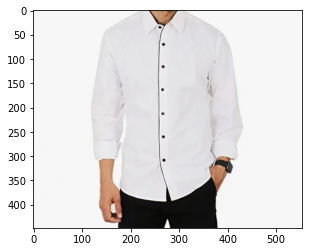

In [123]:
image = Image.open("/kaggle/input/test-amazon/Image5.png")
image = image.convert("RGB")
plt.imshow(image)
image = np.array(image.resize((80, 60)))
images_list = []
images_list.append(np.array(image))
x = np.asarray(images_list)
output_array = model.predict(x)
predicted_indices = np.where(output_array[0] == 1)[0]
predicted_classes = [mlb.classes_[idx] for idx in predicted_indices]
print(predicted_classes)